# 第I部
# 第5章 統計的仮設検定

In [1]:
options(repr.plot.width= 4, repr.plot.height = 4)

## 5.3 標準正規分布を用いた検定

* 検定統計量は $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}}$

### 例題

* 心理学テストの母集団分布は $\bar{X} \approx N \left( \mu, \frac{\sigma^2}{n}\right) $
* 標準化すると， $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \approx N(0, 1)$

In [2]:
library(readr)

In [3]:
d <- read_csv("teaching_methods.csv") # UTF-8
d

,ID,名前,性別,数学,統計,心理学テスト,統計テスト1,統計テスト2,指導法
1,1,大村,男,嫌い,好き,13,6,10,C
2,2,本多,男,嫌い,好き,14,10,13,B
3,3,川崎,男,好き,好き,7,6,8,B
4,4,多村,男,好き,好き,12,10,15,A
5,5,松中,男,嫌い,嫌い,10,5,8,B
6,6,小久保,男,嫌い,嫌い,6,3,6,C
7,7,柴原,男,嫌い,嫌い,8,5,9,A
8,8,井手,男,嫌い,嫌い,15,9,10,D
9,9,田上,男,嫌い,嫌い,4,3,7,D
10,10,松田,男,好き,嫌い,14,3,3,D


In [4]:
names(d) <- c("id", "name", "gender", "math", "stat", "psy_test", "stat_test1", "stat_test2", "teach_method")
d

,id,name,gender,math,stat,psy_test,stat_test1,stat_test2,teach_method
1,1,大村,男,嫌い,好き,13,6,10,C
2,2,本多,男,嫌い,好き,14,10,13,B
3,3,川崎,男,好き,好き,7,6,8,B
4,4,多村,男,好き,好き,12,10,15,A
5,5,松中,男,嫌い,嫌い,10,5,8,B
6,6,小久保,男,嫌い,嫌い,6,3,6,C
7,7,柴原,男,嫌い,嫌い,8,5,9,A
8,8,井手,男,嫌い,嫌い,15,9,10,D
9,9,田上,男,嫌い,嫌い,4,3,7,D
10,10,松田,男,好き,嫌い,14,3,3,D


In [5]:
psy_test <- d$psy_test

（4） 統計検定量の計算

In [6]:
z <- (mean(psy_test) - 12) / (sqrt(10 / length(psy_test)))
z

[1] -2.828427

棄却域を計算する  
上側確率は，

In [7]:
qnorm(1 - 0.05 / 2)

[1] 1.959964

下側確率は，

In [8]:
qnorm(0.05 / 2)

[1] -1.959964

棄却域は，  
$Z \lt -1.95996$, $Z \gt 1.95996$

In [9]:
library(ggplot2)

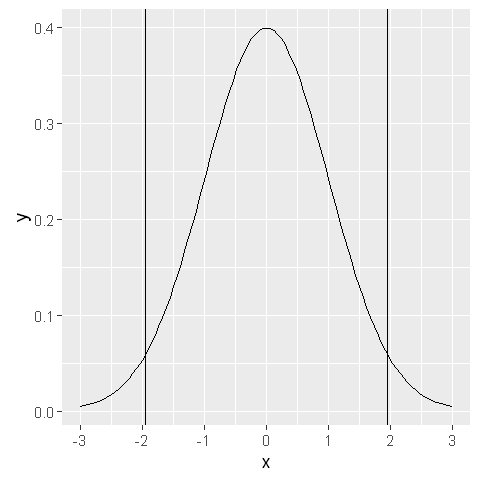

In [10]:
ggplot(data.frame(x = c(-3, 3)), aes(x)) +
    stat_function(fun = dnorm, args = list(mean = 0, sd = 1)) + 
    scale_x_continuous(breaks = c(-3:3, 1)) + 
    geom_vline(xintercept = c(qnorm(0.025), qnorm(0.975)))

$p$値を計算する．  
検定統計量z が左側の棄却域に入る確率は，

In [11]:
pnorm(z)

[1] 0.002338867

両側検定なので，

In [12]:
2 * pnorm(-z, lower.tail = FALSE)

[1] 0.004677735

$p$値が有意水準0.05より小さいので，帰無仮説は棄却される.  
(標本平均は母平均と等しいとは言えない)

## 5.4 $t$分布 を用いた検定

$t = \frac{\bar{X} - \mu}{\hat{\sigma} / \sqrt{n}}$

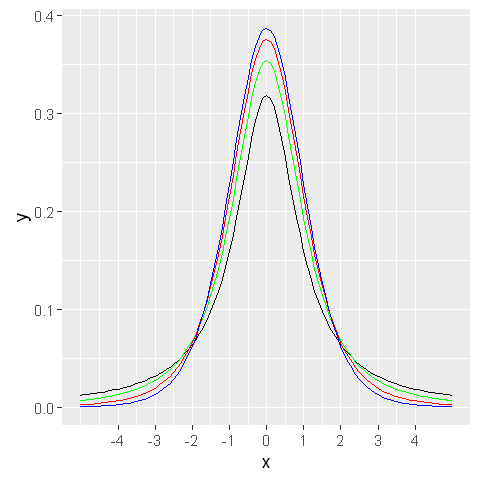

In [13]:
ggplot(data.frame(x = c(-5, 5)), aes(x)) +
    stat_function(fun = dt, args = list(df = 1)) + 
    stat_function(fun = dt, args = list(df = 2), col = "green") + 
    stat_function(fun = dt, args = list(df = 4), col = "red") + 
    stat_function(fun = dt, args = list(df = 8), col = "blue") + 
    scale_x_continuous(breaks = c(-4:4, 1))

母集団分布は， $N(12, \sigma^2)$  
検定統計量$t$は，

In [14]:
t <- (mean(psy_test) - 12) / sqrt(var(psy_test) / length(psy_test))
t

[1] -2.616648

棄却域は，

In [15]:
lower <- qt(0.05 / 2, df = length(psy_test) - 1)
upper <- qt(0.05 / 2, df = length(psy_test) - 1, lower.tail = FALSE)
cat("t < ", lower, ", t > ", upper)

t <  -2.093024 , t >  2.093024

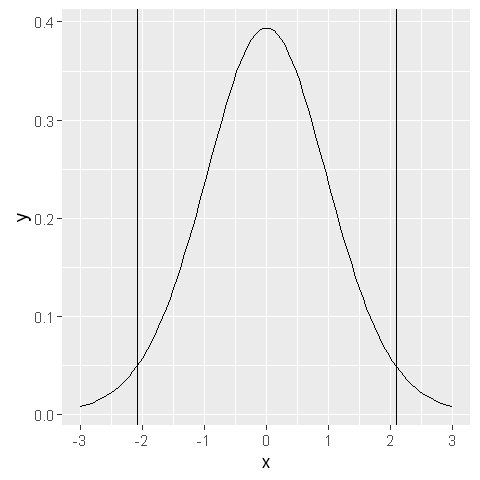

In [16]:
ggplot(data.frame(x = c(-3, 3)), aes(x)) +
    stat_function(fun = dt, args = list(df = 19)) + 
    scale_x_continuous(breaks = c(-3:3, 1)) + 
    geom_vline(xintercept = c(qt(0.025, df = 19), qt(0.975, df = 19)))

帰無仮説は棄却された

$p$ 値は，

In [17]:
2 * pt(t, df = length(psy_test) - 1)

[1] 0.01697092

`t.test()` で計算

In [18]:
t.test(psy_test, mu = 12)


	One Sample t-test

data:  psy_test
t = -2.6166, df = 19, p-value = 0.01697
alternative hypothesis: true mean is not equal to 12
95 percent confidence interval:
  8.400225 11.599775
sample estimates:
mean of x 
       10 


## 5.5 相関係数の検定

H<sub>0</sub>: 母集団において相間が0である（$\rho = 0$）

$t = \frac{r\sqrt{n - 2}}{\sqrt{1 - r^2}}$

In [19]:
stat_test1 <- d$stat_test1
stat_test2 <- d$stat_test2

検定統計量は，

In [20]:
r <- cor(stat_test1, stat_test2)
n <- length(stat_test1)
t <- (r * sqrt(n - 2)) / sqrt(1 - r^2)
t

[1] 4.805707

棄却域は，

In [21]:
lower <- qt(0.05 / 2, df = n-2)
upper <- qt(0.05 / 2, df = n - 2, lower.tail = FALSE)
cat("t < ", lower, ", t > ", upper)

t <  -2.100922 , t >  2.100922

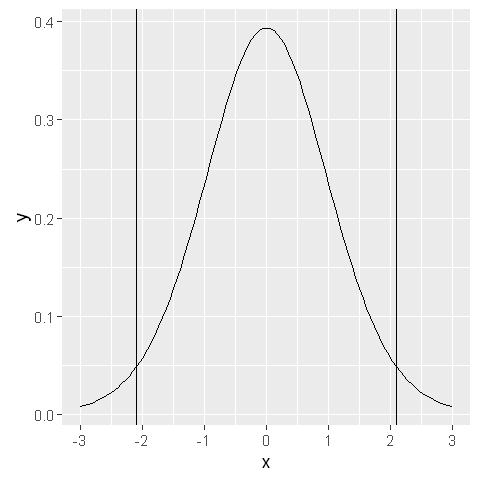

In [22]:
ggplot(data.frame(x = c(-3, 3)), aes(x)) +
    stat_function(fun = dt, args = list(df = n - 2)) + 
    scale_x_continuous(breaks = c(-3:3, 1)) + 
    geom_vline(xintercept = c(qt(0.025, df = n - 2), qt(0.975, df = n - 2)))

帰無仮説は棄却された

$p$ 値は，

In [23]:
2 * pt(-t, df = n - 2)

[1] 0.0001416229

`cor.test()` で計算

In [24]:
cor.test(stat_test1, stat_test2)


	Pearson's product-moment correlation

data:  stat_test1 and stat_test2
t = 4.8057, df = 18, p-value = 0.0001416
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4596086 0.8952048
sample estimates:
     cor 
0.749659 


## 5.6 カイ二乗検定

In [25]:
math <- d$math
stat <- d$stat
table(math, stat)

      stat
math   嫌い 好き
  嫌い   10    4
  好き    2    4

検定統計量

$$\chi^2 = \sum_{i = 1}^{k} \frac{(O_i - E_i)^2}{E_i}$$

カイ二乗分布

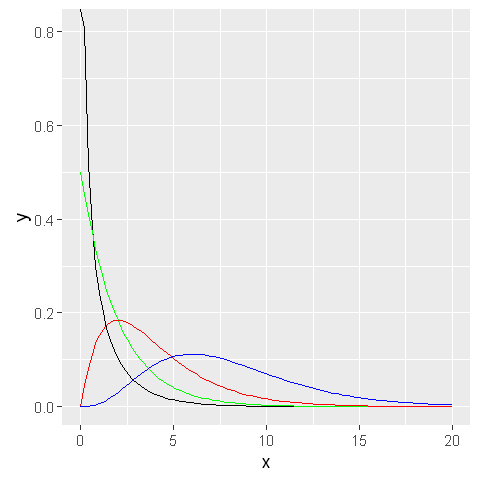

In [26]:
ggplot(data.frame(x = c(0, 20)), aes(x)) + 
    stat_function(fun = dchisq, args = list(df = 1)) + 
    stat_function(fun = dchisq, args = list(df = 2), col = "green") + 
    stat_function(fun = dchisq, args = list(df = 4), col = "red") + 
    stat_function(fun = dchisq, args = list(df = 8), col = "blue")

観測度数

In [27]:
library(pipeR)

In [28]:
m.o <- table(math, stat)
m.o

      stat
math   嫌い 好き
  嫌い   10    4
  好き    2    4

In [29]:
m.o %>>% rowSums

嫌い 好き 
  14    6

In [30]:
m.o %>>% colSums

嫌い 好き 
  12    8

In [31]:
m.o %>>% sum

[1] 20

期待度数

In [32]:
m.o.c <- colSums(m.o)
m.e <- rbind(m.o.c, m.o.c) * rowSums(m.o) / sum(m.o)
m.e

,嫌い,好き
m.o.c,8.4,5.6
m.o.c,3.6,2.4


In [33]:
chi2 <- sum((m.o - m.e)^2 / m.e)
chi2

[1] 2.539683

棄却域は，

In [34]:
n <- 2
qchisq(0.05, df = (n - 1) * (n - 1), lower.tail = FALSE)

[1] 3.841459

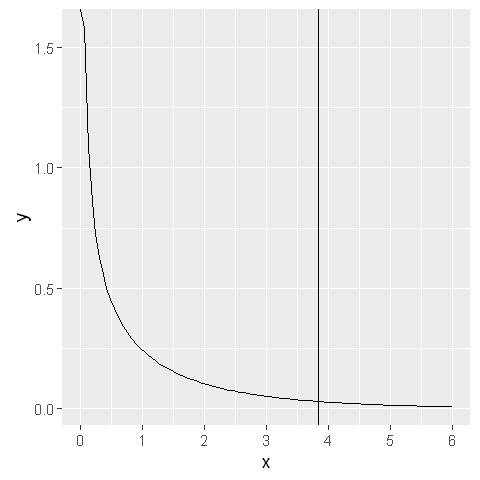

In [35]:
ggplot(data.frame(x = c(0, 6)), aes(x)) +
    stat_function(fun = dchisq, args = list(df = (n - 1) * (n - 1))) + 
    scale_x_continuous(breaks = c(0:6, 1)) + 
    geom_vline(xintercept = c(qchisq(0.95, df = (n - 1) * (n - 1))))

帰無仮説は棄却されなかった．

$p$ 値を計算すると，

In [36]:
pchisq(chi2, df = (n - 1) * (n - 1), lower.tail = FALSE)

[1] 0.1110171

`chisq.test()` で計算すると，

In [37]:
chisq.test(m.o, correct = FALSE)

Warning message:
In chisq.test(m.o, correct = FALSE): Chi-squared approximation may be incorrect


	Pearson's Chi-squared test

data:  m.o
X-squared = 2.5397, df = 1, p-value = 0.111


## 5.7 サンプルサイズ

サンプルサイズが大きくなると，検定結果が有意になりやすい

In [38]:
reg_a <- matrix(c(16, 12, 4, 8), 2, 2)
rownames(reg_a) <- c("文系", "理系")
colnames(reg_a) <- c("履修した", "履修してない")
reg_a

,履修した,履修してない
文系,16,4
理系,12,8


In [39]:
chisq.test(reg_a, correct = FALSE)


	Pearson's Chi-squared test

data:  reg_a
X-squared = 1.9048, df = 1, p-value = 0.1675


In [40]:
reg_b <- reg_a * 10
reg_b

,履修した,履修してない
文系,160,40
理系,120,80


In [41]:
chisq.test(reg_b, correct = FALSE)


	Pearson's Chi-squared test

data:  reg_b
X-squared = 19.048, df = 1, p-value = 1.275e-05


## 練習問題

### （1）

In [42]:
height <- c(165,150,170,168,159,170,167,178,155,159,161,162,166,171,155,160,168,172,155,167)
t.test(height, mu = 170)


	One Sample t-test

data:  height
t = -3.8503, df = 19, p-value = 0.001079
alternative hypothesis: true mean is not equal to 170
95 percent confidence interval:
 160.584 167.216
sample estimates:
mean of x 
    163.9 


帰無仮説が棄却されたので，無作為標本とは言えない

### （2）

In [43]:
d.study <- data.frame(time = c(1, 3, 10, 12, 6, 3, 8, 4, 1, 5), score = c(20, 40, 100, 80, 50, 50, 70, 50, 10, 60))
d.study

,time,score
1,1,20
2,3,40
3,10,100
4,12,80
5,6,50
6,3,50
7,8,70
8,4,50
9,1,10
10,5,60


In [44]:
cor.test(d.study$time, d.study$score)


	Pearson's product-moment correlation

data:  d.study$time and d.study$score
t = 6.1802, df = 8, p-value = 0.0002651
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6542283 0.9786369
sample estimates:
      cor 
0.9092974 


帰無仮説が棄却されたので，無相関ではない

### （3）

スピアマンの順位相関係数

In [45]:
cor(d.study$time, d.study$score, method = "spearman")

[1] 0.9382895

In [46]:
cor.test(d.study$time, d.study$score, method = "spearman")

Warning message:
In cor.test.default(d.study$time, d.study$score, method = "spearman"): Cannot compute exact p-value with ties


	Spearman's rank correlation rho

data:  d.study$time and d.study$score
S = 10.182, p-value = 5.887e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9382895 


ケンドールの順位相関係数

In [47]:
cor(d.study$time, d.study$score, method = "kendall")

[1] 0.8471174

In [48]:
cor.test(d.study$time, d.study$score, method = "kendall")

Warning message:
In cor.test.default(d.study$time, d.study$score, method = "kendall"): Cannot compute exact p-value with ties


	Kendall's rank correlation tau

data:  d.study$time and d.study$score
z = 3.2937, p-value = 0.0009889
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.8471174 


### （4）

In [49]:
library(readxl)

In [50]:
d.food <- read_excel("Chap03_food.xlsx", sheet = 1)
head(d.food)

,WesternOrJapanese,SweetOrHot
1,洋食,甘党
2,和食,辛党
3,和食,甘党
4,洋食,甘党
5,和食,辛党
6,洋食,辛党


In [51]:
m.o <- table(d.food)
m.o

                 SweetOrHot
WesternOrJapanese 甘党 辛党
             洋食    6    4
             和食    3    7

In [52]:
chisq.test(m.o, correct = FALSE)

Warning message:
In chisq.test(m.o, correct = FALSE): Chi-squared approximation may be incorrect


	Pearson's Chi-squared test

data:  m.o
X-squared = 1.8182, df = 1, p-value = 0.1775


帰無仮説を棄却できない

### （5）

#### （5-1）

In [53]:
jap <- c(60, 40, 30, 70, 55)
soc <- c(80, 25, 35, 70, 50)

In [54]:
cor.test(jap, soc)


	Pearson's product-moment correlation

data:  jap and soc
t = 2.6952, df = 3, p-value = 0.07408
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1590624  0.9892731
sample estimates:
     cor 
0.841263 


#### （5-2）

In [55]:
jap <- rep(jap, 2)
soc <- rep(soc, 2)

In [56]:
cor.test(jap, soc)


	Pearson's product-moment correlation

data:  jap and soc
t = 4.4013, df = 8, p-value = 0.002283
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4499858 0.9615658
sample estimates:
     cor 
0.841263 


サンプルサイズが2倍になると，相関係数は変わらないが，$p$値が小さくなった

In [57]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------
Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.2.3 (2015-12-10)
 system   x86_64, mingw32             
 ui       RTerm                       
 language en                          
 collate  Japanese_Japan.932          
 tz       Asia/Tokyo                  
 date     2016-05-18                  

 package    * version date       source                            
 base64enc    0.1-3   2015-07-28 CRAN (R 3.2.2)                    
 colorspace   1.2-6   2015-03-11 CRAN (R 3.2.1)                    
 devtools     1.10.0  2016-01-23 CRAN (R 3.2.3)                    
 digest       0.6.9   2016-01-08 CRAN (R 3.2.3)                    
 evaluate     0.8     2015-09-18 CRAN (R 3.2.2)                    
 ggplot2    * 2.0.0   2015-12-18 CRAN (R 3.2.3)                    
 gtable       0.1.2   2012-12-05 CRAN (R 3.2.1)                    
 IRdisplay    0.3     2015-04-27 local                             
 IRkernel     0.6     2016-02-08 Github (IRkernel/IRkernel@40dc791)
 jsonli